##Importing Libraries

In [77]:
import random
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV, RepeatedStratifiedKFold
#from sklearn import svm
from sklearn.svm import SVR
from sklearn import tree
from sklearn.naive_bayes import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
print("Libraries imported.")

Libraries imported.


##Loading the dataset

In [78]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/train_set.tsv'
dataset = pd.read_csv(filename, sep='\t', header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Normalizing between 0 and 1

In [90]:
scaler = preprocessing.MinMaxScaler()#tra 0 e 1
d = scaler.fit_transform(dataset)
names = dataset.columns
scaled_df = pd.DataFrame(d,columns=names)
X_all = scaled_df.iloc[:,:-1]
y_all = scaled_df.iloc[:,-1]
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions
0,0.003575,0.167803,0.161493,0.508819,0.985962,0.202369,0.721751,0.234008,0.174139,0.482895,...,0.116869,0.723264,0.255023,0.105060,0.693768,0.915946,0.482930,0.708205,0.694046,0.75
1,0.640368,0.422673,0.741763,0.165028,0.229878,0.010242,0.415316,0.415609,0.666341,0.787835,...,0.771184,0.339956,0.686534,0.586095,0.287196,0.113537,0.337113,0.488949,0.271890,0.00
2,0.292795,0.407523,0.804773,0.907133,0.386911,0.849959,0.683186,0.396191,0.192501,0.429573,...,0.911715,0.397539,0.151020,0.628936,0.322092,0.906957,0.786650,0.895128,0.553126,0.00
3,0.576375,0.245460,0.418722,0.271772,0.073294,0.197715,0.336344,0.786404,0.843621,0.441296,...,0.801837,0.722266,0.645184,0.357215,0.686300,0.138116,0.220912,0.196630,0.589351,0.00
4,0.368716,0.817790,0.225677,0.846167,0.177602,0.817414,0.220479,0.809164,0.436669,0.530544,...,0.222615,0.642145,0.399705,0.611108,0.909877,0.759109,0.138896,0.817285,0.611065,0.00


##Normalized Dataset with unit Vector

In [86]:
names = dataset.columns
X_all = dataset.iloc[:,:-2]
y_all = dataset.iloc[:,-1]
X_all=preprocessing.normalize(X_all)
#y_all=preprocessing.normalize(y_all)
class_names = np.array(["0","1","2","3","4"])

##Normalized Test with mean removal and variance scaling

In [ ]:
scaler = preprocessing.StandardScaler().fit(dataset)
d=scaler.fit_transform(dataset)
names = dataset.columns
scaled_df = pd.DataFrame(d,columns=names)
X_all = scaled_df.iloc[:,:-2]
y_all = scaled_df.iloc[:,-2]
class_names = np.array(["0","1","2","3","4"])
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_vy,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y
0,-1.716449,-1.622653,-1.605434,0.028033,1.528305,-1.120844,0.848169,-0.934516,-1.458329,-0.080881,...,0.149195,-1.430235,0.800377,-0.866545,-1.699431,0.821942,1.219419,-0.035688,0.782818,0.668860
1,0.517720,-0.404497,1.192812,-1.041943,-0.803886,-1.863554,-0.341506,-0.293685,0.855370,1.341817,...,-1.599624,1.148769,-0.688636,0.649873,0.354368,-0.916189,-1.201367,-0.507752,-0.063923,-0.951171
2,-0.701730,-0.476909,1.496668,1.267701,-0.319508,1.382562,0.698446,-0.362207,-1.372011,-0.329652,...,-1.169040,1.702676,-0.464945,-1.232036,0.537281,-0.767010,1.192301,0.947566,1.504686,0.128075
3,0.293204,-1.251492,-0.364995,-0.709726,-1.286880,-1.138833,-0.648101,1.014773,1.688712,-0.274959,...,0.952515,1.269591,0.796500,0.504560,-0.622844,0.790017,-1.127215,-0.883940,-1.192821,0.267092
4,-0.435363,1.483968,-1.295918,1.077958,-0.965134,1.256749,-1.097924,1.095090,-0.224250,0.141425,...,-0.210913,-1.013435,0.485260,-0.358106,0.461165,1.745826,0.746258,-1.149457,1.204069,0.350421


## Normalized test with RobustScaler

In [ ]:
scaler = preprocessing.RobustScaler().fit(dataset)
d=scaler.fit_transform(dataset)
names = dataset.columns
scaled_df = pd.DataFrame(d,columns=names)
X_all = scaled_df.iloc[:,:-2]
y_all = scaled_df.iloc[:,-2]
class_names = np.array(["0","1","2","3","4"])
X_all.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_vy,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y
0,-1.013418,-1.024432,-1.092455,0.006052,0.771178,-0.677074,0.504303,-0.580127,-1.003186,-0.044063,...,0.051787,-0.842565,0.437358,-0.457888,-1.056806,0.499256,0.574846,0.002500,0.428784,0.364549
1,0.299283,-0.236641,0.792996,-0.536874,-0.384643,-1.104799,-0.180816,-0.188856,0.550774,0.856713,...,-0.835904,0.685923,-0.388408,0.419413,0.215760,-0.553222,-0.587333,-0.245736,-0.039274,-0.544360
2,-0.417213,-0.283471,0.997733,0.635083,-0.144588,0.764636,0.418080,-0.230693,-0.945212,-0.201572,...,-0.617342,1.014205,-0.264356,-0.669337,0.329096,-0.462891,0.561827,0.519547,0.827816,0.061145
3,0.167367,-0.784399,-0.256651,-0.368300,-0.624012,-0.687434,-0.357381,0.610047,1.110475,-0.166943,...,0.459548,0.757530,0.435208,0.335344,-0.389736,0.479925,-0.551735,-0.443555,-0.663302,0.139140
4,-0.260707,0.984643,-0.883904,0.538804,-0.464557,0.692180,-0.616429,0.659086,-0.174336,0.096689,...,-0.131002,-0.595542,0.262602,-0.163738,0.281933,1.058690,0.347689,-0.583178,0.661642,0.185891


##Splitting the dataset

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.10, 
                                                    random_state=7)
print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

Size of training set: 900
Size of test set: 100


##SVR fitting

In [92]:
model = SVR(kernel='poly', C=1.5, degree=3, gamma='scale', epsilon=0.1)
print(len(model.support_vectors_))

[458]
(900, 36)
0
36
[0.38979822]
458
[]


##Linear Regression fitting

In [81]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

16060.026318714477
[9.00196105e+00 8.53913539e+00 7.69683420e+00 7.51346041e+00
 7.46688326e+00 7.28387238e+00 7.09745074e+00 6.93843981e+00
 6.86527672e+00 6.76715811e+00 6.53809601e+00 6.45891413e+00
 6.33916591e+00 6.10852757e+00 5.87878665e+00 5.77328586e+00
 5.68650638e+00 5.55380910e+00 4.33619512e+00 4.15097361e+00
 1.05421890e-02 1.03206690e-02 9.86858109e-03 9.74608509e-03
 9.54989782e-03 9.37944699e-03 9.24346614e-03 9.17931755e-03
 8.83877766e-03 8.71986569e-03 1.81531540e-04 1.63976927e-04
 1.62551068e-04 1.60257156e-04 1.55418852e-04]
[-9.36890702e+07  4.31373557e+03  2.25836868e+03 -1.15384580e+06
  9.85520522e+05 -3.03596155e+03  1.05812057e+02 -3.03456214e+07
  5.19397922e+03 -2.39640621e+03  9.79275051e+05 -2.38969280e+06
 -4.25246045e+03  3.84918464e+03  1.39008281e+08 -5.99630128e+03
  1.74978337e+03 -1.04702259e+06 -3.87296224e+05  5.44360531e+03
 -6.35825699e+01 -6.33759039e+07 -2.42740607e+03  9.02833184e+02
 -6.76259773e+05 -5.75873468e+05 -1.69360845e+03  5.5971

##Evaluating the model

In [93]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.02
Regression score: 0.17


##Plotting the prediction on test set of the minCPA

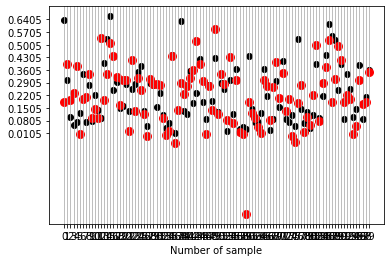

In [94]:
# Plot outputs
fig = plt.figure()
ax = fig.add_subplot(111)
xaxes=np.array([i for i in range(len(X_test))])
plt.scatter(xaxes , y_test,  color='black')
plt.scatter(xaxes, y_pred, color='red', linewidth=3)
plt.xticks((xaxes))
plt.yticks((np.arange(y_test.min(), y_test.max(), 0.07)))
plt.xlabel("Number of sample")
plt.grid(axis='x', linestyle='-')
#plt.show()

##GridSearch for SVR

In [95]:
grid_search_regression = GridSearchCV(model,
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            'degree': np.arange(1,4,1),
                            'epsilon': np.arange(0.01,0.4,0.01),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(X_train,y_train))

#Best parameters for the regressor
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best R2 score: %.2f" %grid_search_regression.best_score_)



Grid Search for Regression


Fitting 5 folds for each of 8892 candidates, totalling 44460 fits
GridSearchCV(cv=5, estimator=SVR(C=1.5, kernel='poly'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'degree': array([1, 2, 3]),
                         'epsilon': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2', verbose=1)
Best regression hyper-parameters: {'C': 0.5, 'degree': 1, 'epsilon': 0.05, 'kernel': 'rbf'}
Best R2 score: 0.41


In [96]:
# Make predictions using the testing set
y_pred = grid_search_regression.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.01
Regression score: 0.47


##Grid Search for Linear Regression

In [84]:
grid_search_regression = GridSearchCV(model,
                           {
                               'fit_intercept':(True,False),
                            'normalize':(True,False),
                            'positive':(True,False)        
                           },cv=10, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(X_all,y_all))

#Best parameters for the regressor
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best R2 score: %.2f" %grid_search_regression.best_score_)



Grid Search for Regression


Fitting 10 folds for each of 8 candidates, totalling 80 fits
GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False),
                         'positive': (True, False)},
             scoring='r2', verbose=1)
Best regression hyper-parameters: {'fit_intercept': True, 'normalize': False, 'positive': True}
Best R2 score: -0.03


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [85]:
# Make predictions using the testing set
y_pred = grid_search_regression.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 87719862.39
Regression score: -0.03
